In [ ]:
!pip install face_recognition

In [ ]:
# face_recognition
# load_image_file: 讀取圖片
# face_encodings: 把所有認到的人臉都變成數字
# face_distance: 跟資料庫的人臉做一個距離的比較
# face_locations: 認到的人臉位置在哪裡

128分數: [-1.14578821e-01  8.27563480e-02  2.61257254e-02 -5.83898164e-02
 -1.75547495e-01  7.62083381e-03 -8.98971632e-02 -3.97309735e-02
  1.55587703e-01 -1.49469823e-01  1.73299789e-01 -6.54513761e-02
 -2.19802573e-01 -1.79020092e-02 -6.21570870e-02  2.17358172e-01
 -1.67115554e-01 -2.07054898e-01  6.32639043e-03  1.86132304e-02
  7.25180954e-02  5.70140406e-02 -3.81072089e-02  9.32224467e-03
 -1.28377333e-01 -3.33441556e-01 -8.91660750e-02 -7.88099319e-03
 -5.99493980e-02 -6.35437816e-02 -2.09169518e-02  7.64134079e-02
 -1.60940051e-01  3.31073813e-03  1.04241222e-01  1.38982728e-01
 -6.27681799e-03 -9.61199552e-02  1.26741767e-01 -2.46405024e-02
 -3.29541713e-01  2.33362094e-02  1.06978387e-01  2.31692895e-01
  1.66915447e-01  3.24175693e-04 -4.84719649e-02 -1.34519935e-01
  1.33673579e-01 -1.78379923e-01  5.82496040e-02  1.68834627e-01
  1.07913621e-01  5.12509756e-02  3.63468081e-02 -1.44770309e-01
  1.59168690e-02  1.29255384e-01 -1.08565673e-01 -4.58891615e-02
  8.59613568e-02 -

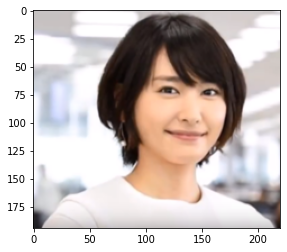

In [6]:
import face_recognition
import matplotlib.pyplot as plt
%matplotlib inline
img = face_recognition.load_image_file("新垣結衣.png")
# [0]: 特殊設計過, 一定只會有一個人
en = face_recognition.face_encodings(img)[0]
print("128分數:", en)
plt.imshow(img)

In [ ]:
import glob
import numpy as np

fs = glob.glob("*.png") + glob.glob("*.jpg")
names = list(map(lambda s:s.split(".")[0], fs))
def get_encodings(fn):
    img = face_recognition.load_image_file(fn)
    en = face_recognition.face_encodings(img)[0]
    return en
encodings = list(map(get_encodings, fs))
print("names:", names)
print("encoding:", encodings)

網址:https://obs.line-scdn.net/0hhFAj_lruN2l8ExwEe2xIPkZFNAZPfyRqGCVmaj99aV0EIiA-EHZxXFATbAlXJnA3EiF7ClgULFgBJnc9QHVx/w644


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


跟 蔡英文 的距離: 0.6414184927635781
跟 新垣結衣 的距離: 0.4206767798891878
跟 韓國瑜 的距離: 0.7435382637348351
跟 陳信宏 的距離: 0.597580837192891
[最近]: 新垣結衣
--------------------------------------------------
跟 蔡英文 的距離: 0.7048211765090572
跟 新垣結衣 的距離: 0.5957773610920865
跟 韓國瑜 的距離: 0.8044825952787054
跟 陳信宏 的距離: 0.7217020008250358
[最近]: 新垣結衣
--------------------------------------------------


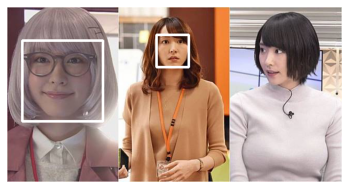

In [43]:
# https://github.com/ageitgey/face_recognition/blob/master/examples/facerec_from_webcam_faster.py
# argmin: 最小值的索引 argmax: 最大值的索引
import requests
import cv2
url = input("網址:")
# stream: 以檔案方式回傳答案 
# verify: 不要跟我說不安全
response = requests.get(url, stream=True, verify=False)
img = face_recognition.load_image_file(response.raw)
people = face_recognition.face_encodings(img)
locs = face_recognition.face_locations(img)
for person, (top, right, bottom, left) in zip(people, locs):
    # cv2.rectangle(圖片, 左上, 右上, bgr, 粗細)
    cv2.rectangle(img, (left, top), (right, bottom), (255, 255, 255), 3)
    ds = face_recognition.face_distance(person, encodings)
    for n, d in zip(names, ds):
        print("跟", n, "的距離:", d)
    print("[最近]:", names[ds.argmin()])
    print("-" * 50)
plt.axis("off")
plt.imshow(img)